# What is Time Series?

- To understand the pattern of trends, seasonality and cyclic behaviour


**Key Components**
- Trends : Long term increase or decrease in the data

- Seasonality: Regular pattern on a basis of fixed period (days, weeks, year)

- Cyclical: Repeating pattern but without any fixed period

- Noise: Variations


**Models**

-  Classical Statistical Models

1. AutoRegrssive Model (AR Model): Past value to predict the future

2. Moving Average(MA) Model: Past value with noise

3. AutoRegressive Moving Average (ARMA) Model: AR + MA, stationary data

4. AutoRegressive Integrated Moving Average(ARIMA) Model: Streaming Data -> Batch data for future prediction

5. SARIMA (Seasonal ARIMA) Model: Fixed Period


- Machine Learning Models

1. Linear Regression: Simple

2. Decision Tree and Random Forest: Involve Lag features (1, 7, 10)

3. XGBoost/LightBoost: Lag + MA as Input to predict Time series


- Deep Learning Models

1. RNN (Recurent Neural Network): Memory-> stores past information -> Small Data set

2. LSTM (Long Short Term Memory): Large Data -> Forget Gate -> Complex Data

3. GRU (Gated Recurrent Unit): LSTM but simpler

4. Transformers: Combines ML with DL for Time Series Predictions

# Steps to Follow

1. EDA : Missing values, general time series

2. Stationarity Check: Augmented Duller Test (stationary or not)

3. Decomposition: Key components

4. Model Building

5. Validation

6. Forecasting: Future predictions


https://www.kluniversity.in/arp/uploads/2093.pdf


https://preset.io/blog/time-series-forecasting-a-complete-guide/

https://medium.com/@wainaina.pierre/the-complete-guide-to-time-series-forecasting-models-ef9c8cd40037


https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

**"How has Toronto's weather changed over the past century, and what trends or anomalies can help us understand the evolving climate patterns for future urban planning and public preparedness?"**

This project aims to analyze long-term weather data in Toronto from November 1937 to July 2025, focusing on temperature, precipitation, snowfall, and wind patterns. Students will perform exploratory data analysis, detect long-term and seasonal trends, uncover weather anomalies, and create insightful visualizations. The objective is to identify meaningful climate patterns and provide a data-driven narrative that can inform environmental planning, policy-making, and sustainability strategies.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Step 2: Load the Data
df = pd.read_csv('weatherstats_toronto_daily.csv')


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24168\4032986422.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherstats_toronto_daily.csv')


- Converts the date column to datetime format.

- Sets date as the index — crucial for time-series operations.

- Sorts the index chronologically.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32036 entries, 1937-10-31 to 2025-07-16
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   max_temperature                31906 non-null  float64
 1   avg_hourly_temperature         26495 non-null  float64
 2   avg_temperature                31897 non-null  float64
 3   min_temperature                31900 non-null  float64
 4   max_humidex                    6968 non-null   float64
 5   min_windchill                  9783 non-null   float64
 6   max_relative_humidity          26495 non-null  float64
 7   avg_hourly_relative_humidity   26495 non-null  float64
 8   avg_relative_humidity          26495 non-null  float64
 9   min_relative_humidity          26495 non-null  float64
 10  max_dew_point                  26495 non-null  float64
 11  avg_hourly_dew_point           26495 non-null  float64
 12  avg_dew_point                

In [4]:
df.head(5)

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
1937-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-01,15.0,NaN,5.55,-3.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-02,18.3,NaN,9.45,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-03,14.4,NaN,6.10,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-11-04,9.4,NaN,5.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Step 3: Dataset Overview
print("Shape of the dataset:", df.shape)

Shape of the dataset: (32036, 71)


In [6]:
print("\nColumns:", df.columns.tolist())


Columns: ['max_temperature', 'avg_hourly_temperature', 'avg_temperature', 'min_temperature', 'max_humidex', 'min_windchill', 'max_relative_humidity', 'avg_hourly_relative_humidity', 'avg_relative_humidity', 'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point', 'avg_dew_point', 'min_dew_point', 'max_wind_speed', 'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_wind_gust', 'wind_gust_dir_10s', 'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea', 'min_pressure_sea', 'max_pressure_station', 'avg_hourly_pressure_station', 'avg_pressure_station', 'min_pressure_station', 'max_visibility', 'avg_hourly_visibility', 'avg_visibility', 'min_visibility', 'max_health_index', 'avg_hourly_health_index', 'avg_health_index', 'min_health_index', 'heatdegdays', 'cooldegdays', 'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation', 'rain', 'snow', 'snow_on_ground', 'sunrise_hhmm', 'sunrise_unixtime', 'sunrise_f', 'sunset_hhmm', 'sunset_unixtime', 'su

In [7]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        max_temperature  avg_hourly_temperature  avg_temperature  \
count     31906.000000            26495.000000     31897.000000   
mean         12.926468                8.210708         7.965333   
std          11.552343               10.570432        10.682003   
min         -21.000000              -24.120000       -24.700000   
25%           3.100000                0.140000        -0.190000   
50%          13.300000                8.400000         8.290000   
75%          23.200000               17.500000        17.200000   
max          38.300000               31.700000        31.950000   

       min_temperature  max_humidex  min_windchill  max_relative_humidity  \
count     31900.000000  6968.000000    9783.000000           26495.000000   
mean          3.003583    31.162026     -13.212511              88.799132   
std          10.160912     4.485117       7.504481               8.882725   
min         -31.300000    25.000000     -45.000000              38

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 avg_hourly_cloud_cover_4         32036
avg_cloud_cover_4                32036
max_cloud_cover_4                32036
solar_radiation                  32036
min_cloud_cover_4                32036
avg_cloud_cover_10               31799
min_cloud_cover_10               31799
max_cloud_cover_10               31799
avg_hourly_cloud_cover_10        31799
avg_health_index                 31780
max_health_index                 31780
min_health_index                 31780
avg_hourly_health_index          31780
max_uv_forecast                  28495
min_uv_forecast                  28495
sunrise_unixtime                 27821
sunset_unixtime                  27821
sunrise_f                        27821
sunset_hhmm                      27821
max_high_temperature_forecast    27821
max_low_temperature_forecast     27821
min_low_temperature_forecast     27821
sunrise_hhmm                     27821
daylight                         27821
min_high_temperature_forecast    27821
sunset_

In [9]:
#Calculate the Missing percentage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_percentage = df.isnull().mean() * 100

#Display the sorted columns
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)

avg_hourly_cloud_cover_4         100.000000
avg_cloud_cover_4                100.000000
max_cloud_cover_4                100.000000
solar_radiation                  100.000000
min_cloud_cover_4                100.000000
avg_cloud_cover_10                99.260207
min_cloud_cover_10                99.260207
max_cloud_cover_10                99.260207
avg_hourly_cloud_cover_10         99.260207
avg_health_index                  99.200899
max_health_index                  99.200899
min_health_index                  99.200899
avg_hourly_health_index           99.200899
max_uv_forecast                   88.946810
min_uv_forecast                   88.946810
sunrise_unixtime                  86.842927
sunset_unixtime                   86.842927
sunrise_f                         86.842927
sunset_hhmm                       86.842927
max_high_temperature_forecast     86.842927
max_low_temperature_forecast      86.842927
min_low_temperature_forecast      86.842927
sunrise_hhmm                    

In [10]:
'''

# Step 4: Missing Values Handling
df.fillna(method='ffill', inplace=True)  # Forward-fill
df.fillna(method='bfill', inplace=True)  # Backward-fill

'''

"\n\n# Step 4: Missing Values Handling\ndf.fillna(method='ffill', inplace=True)  # Forward-fill\ndf.fillna(method='bfill', inplace=True)  # Backward-fill\n\n"

In [11]:
# Step 4: Missing Values Handling

valid_cols = df.columns[df.isnull().mean() <= 0.9]

df[valid_cols] = df[valid_cols].fillna(method='ffill').fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_24168\3113668396.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[valid_cols] = df[valid_cols].fillna(method='ffill').fillna(method='bfill')


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

missing_percentage = df.isnull().mean() * 100

#Display the sorted columns
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)

avg_hourly_cloud_cover_4         100.000000
avg_cloud_cover_4                100.000000
max_cloud_cover_4                100.000000
solar_radiation                  100.000000
min_cloud_cover_4                100.000000
avg_cloud_cover_10                99.260207
min_cloud_cover_10                99.260207
max_cloud_cover_10                99.260207
avg_hourly_cloud_cover_10         99.260207
avg_health_index                  99.200899
max_health_index                  99.200899
min_health_index                  99.200899
avg_hourly_health_index           99.200899
max_temperature                    0.000000
avg_hourly_temperature             0.000000
max_relative_humidity              0.000000
min_windchill                      0.000000
max_humidex                        0.000000
min_temperature                    0.000000
avg_temperature                    0.000000
avg_hourly_relative_humidity       0.000000
min_relative_humidity              0.000000
avg_relative_humidity           

In [13]:
'''

## Drop column with 100%
df.dropna(axis=1, how='all', inplace=True)

'''

"\n\n## Drop column with 100%\ndf.dropna(axis=1, how='all', inplace=True)\n\n"

In [14]:
'''

## Drop high missing values 90%+
high_missing = df.columns[df.isnull().mean() > 0.9]
df.drop(high_missing, inplace=True)

'''

'\n\n## Drop high missing values 90%+\nhigh_missing = df.columns[df.isnull().mean() > 0.9]\ndf.drop(high_missing, inplace=True)\n\n'

Fills missing values using forward fill and backward fill, a smart technique for time-series.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32036 entries, 1937-10-31 to 2025-07-16
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   max_temperature                32036 non-null  float64
 1   avg_hourly_temperature         32036 non-null  float64
 2   avg_temperature                32036 non-null  float64
 3   min_temperature                32036 non-null  float64
 4   max_humidex                    32036 non-null  float64
 5   min_windchill                  32036 non-null  float64
 6   max_relative_humidity          32036 non-null  float64
 7   avg_hourly_relative_humidity   32036 non-null  float64
 8   avg_relative_humidity          32036 non-null  float64
 9   min_relative_humidity          32036 non-null  float64
 10  max_dew_point                  32036 non-null  float64
 11  avg_hourly_dew_point           32036 non-null  float64
 12  avg_dew_point                

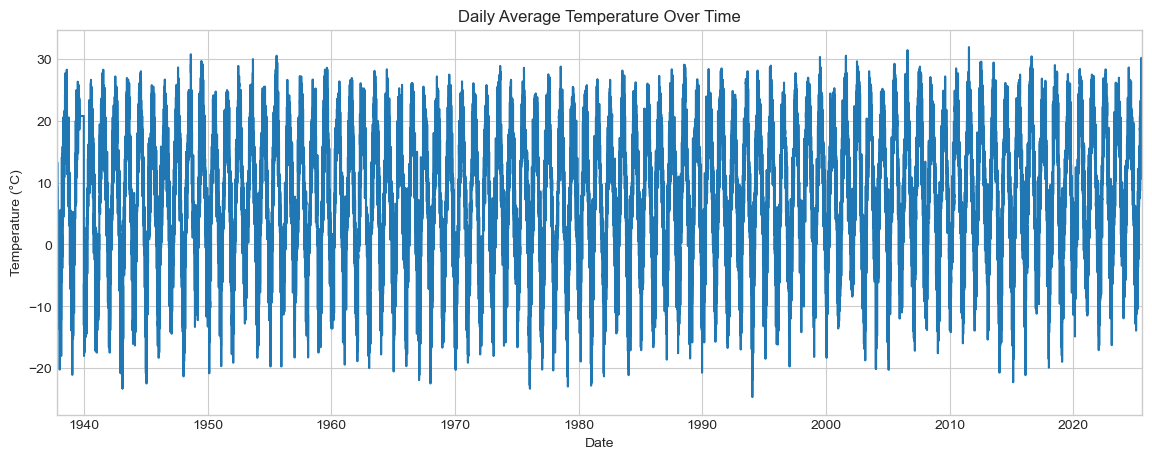

In [16]:
# Step 5: Line Plot – Temperature Over Time
plt.figure(figsize=(14, 5))
df['avg_temperature'].plot(title='Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

Visualizes how the average temperature has changed over time.

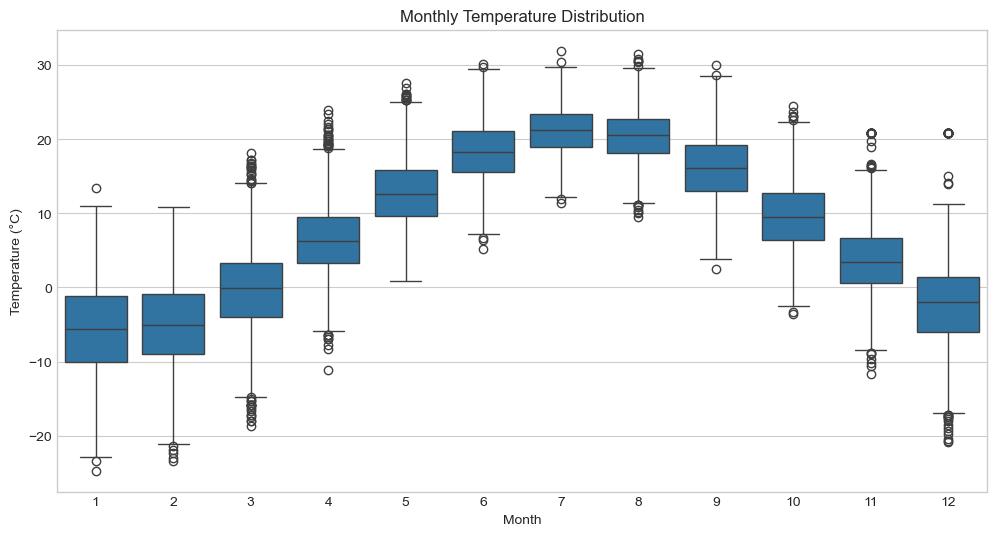

In [17]:
# Step 6: Boxplot – Monthly Temperature Distribution
df['month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='avg_temperature', data=df)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

- January, February, and December have the lowest median temperatures, often below 0°C.

- Outliers are common in winter months, showing extreme cold days below -20°C.

- Temperatures gradually rise from March to May, indicating the transition from winter to spring.

- June, July, and August show the highest median temperatures, around 20–25°C.

- Summer months have a narrower range, indicating more stable weather.

- Temperatures start decreasing again from September to November.

- September still has relatively high temperatures, but a sharp drop is seen by November.

- The box widths are largest in transitional months (Mar, Apr, Oct), reflecting higher variability.

- Clear seasonal patterns are visible, highlighting Toronto’s strong climate seasonality.

- Temperature extremes (outliers) are more frequent in winter than in summer.

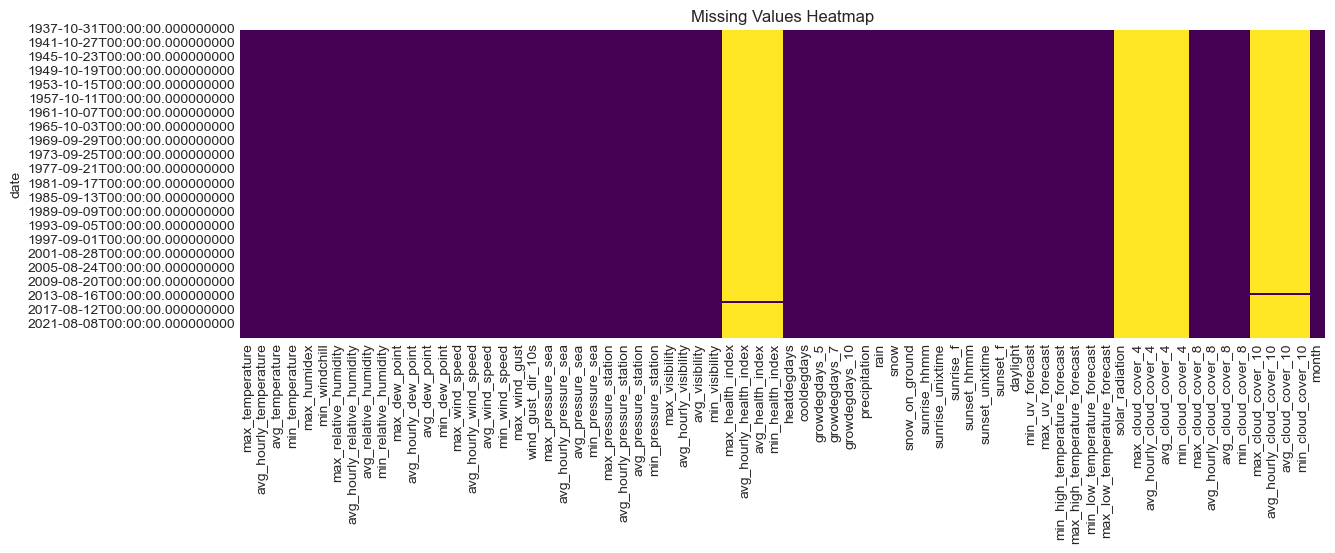

In [18]:
# Step 7: Heatmap – Missing Values
plt.figure(figsize=(14, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

- Most columns have complete data across the entire time range, indicating a well-maintained dataset.

- Significant missing data is observed in the solar_radiation and cloud_cover-related columns.

- Missing values are consistent across time for the affected columns, suggesting data was never recorded rather than lost.

- Dates with missing values appear intermittently across decades, but only for specific features.

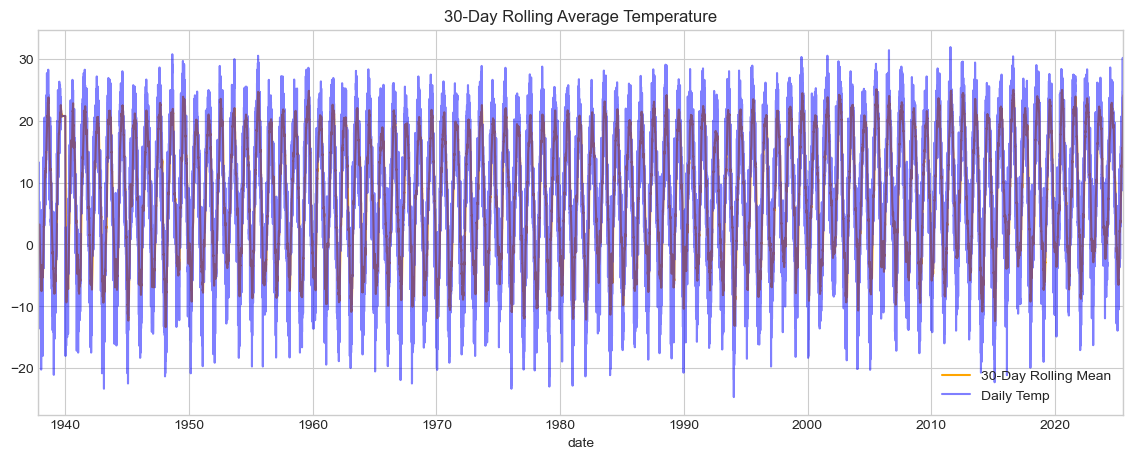

In [19]:
# Step 8: Rolling Average (Moving) – 30-day Rolling Mean
plt.figure(figsize=(14, 5))
df['avg_temperature'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', color='orange')
df['avg_temperature'].plot(alpha=0.5, label='Daily Temp', color='blue')
plt.title('30-Day Rolling Average Temperature')
plt.legend()
plt.show()

- 30-day rolling average has been calculated alongside Daily temperature from 1937 to 2025.

- Blue line is Daily Temeprature (original).

- The 30-day rolling average smooths the daily fluctuations and highlights long-term trends. Highly volatile with hot summers and cold winter due to seasonal changes.

- This is repeating yearly.

- Orange is the smoothed version of blue line. Representing the average temperature.

- No major long-term warming or cooling trend is visually evident, suggesting climate stability in average values.

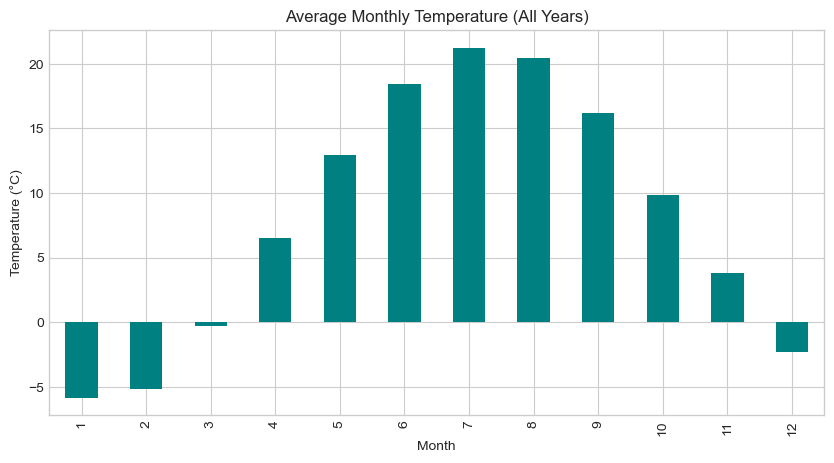

In [20]:
# Step 9: Seasonal Patterns – Average Monthly Temp (Across All Years)
monthly_avg_temp = df.groupby(df.index.month)['avg_temperature'].mean()
plt.figure(figsize=(10, 5))
monthly_avg_temp.plot(kind='bar', color='teal')
plt.title('Average Monthly Temperature (All Years)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

- July records the highest average temperature (~21°C), confirming it as the hottest month.

- January is the coldest month with average temperatures below -5°C.

- A clear seasonal temperature trend is observed: gradual warming from March to July, then cooling from August to December.

- The sharp temperature difference between summer and winter months indicates a temperate continental climate.

# Trend Analysis, Seasonality & Anomalies Grouping by month/year

In [21]:
# Required Libraries for Class 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [23]:
# Load dataset
df = pd.read_csv('weatherstats_toronto_daily.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24168\2267066218.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherstats_toronto_daily.csv')


In [24]:
# Grouping by Month and Year
# ------------------------
monthly_avg = df['avg_temperature'].resample('M').mean()
yearly_avg = df['avg_temperature'].resample('Y').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_24168\2515649966.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['avg_temperature'].resample('M').mean()
C:\Users\user\AppData\Local\Temp\ipykernel_24168\2515649966.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df['avg_temperature'].resample('Y').mean()


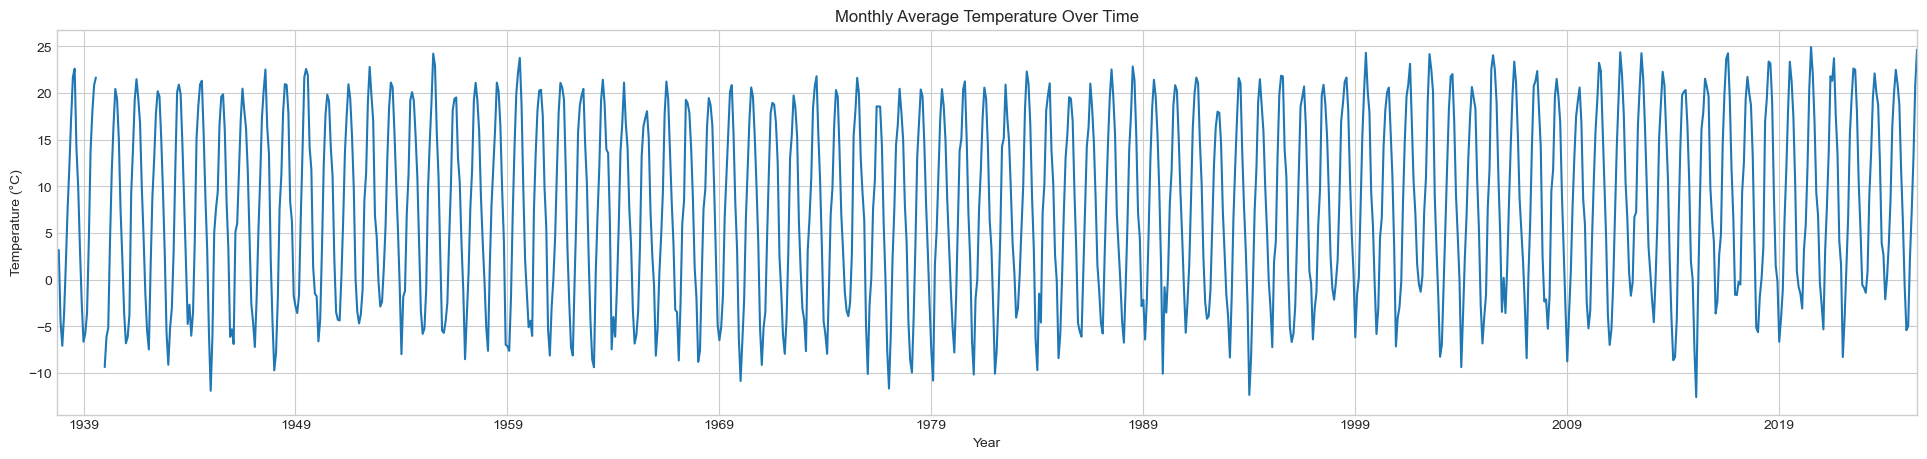

In [25]:
# Plotting Monthly Average Temperature
plt.figure(figsize=(24, 5))
monthly_avg.plot()
plt.title("Monthly Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

- Strong seasonality is evident with a recurring annual temperature cycle from 1937 to 2025.

- Summer peaks and winter troughs appear regularly and predictably across decades.

- Slight upward trend in peak summer temperatures is visible post-2000, indicating possible climate warming.

- The range between summer highs and winter lows has remained relatively stable over time.

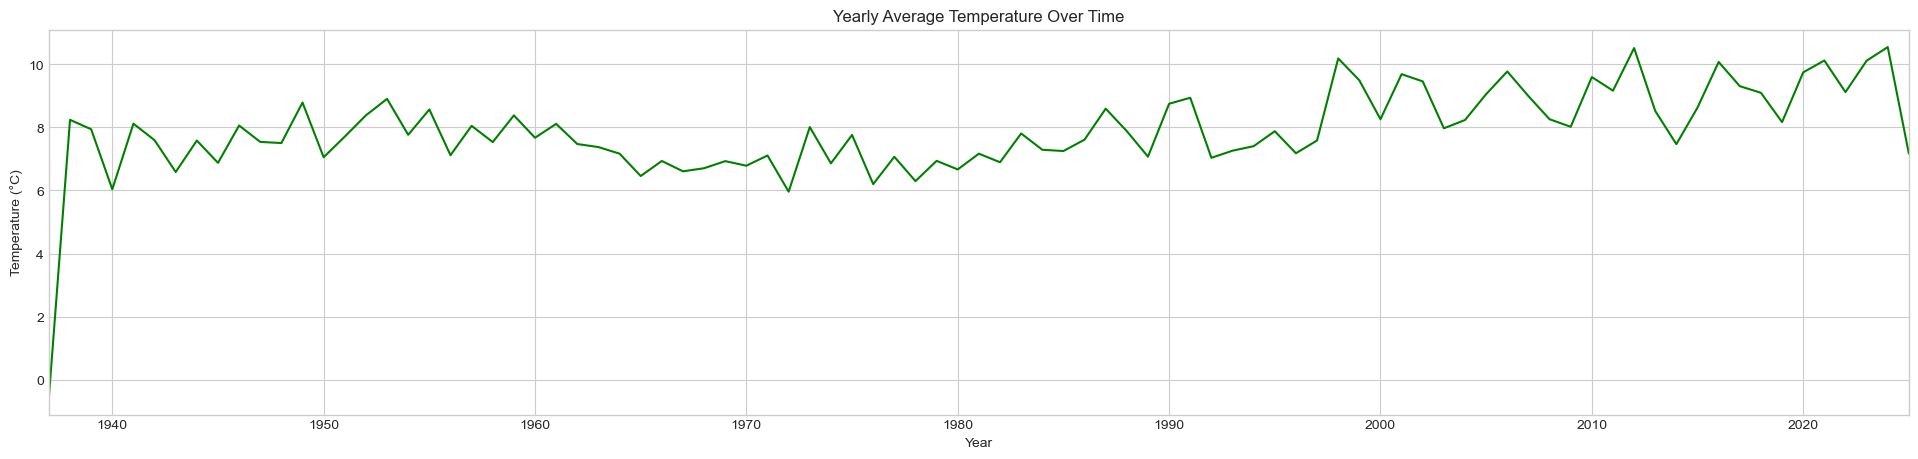

In [26]:
# Plotting Yearly Average Temperature
plt.figure(figsize=(24, 5))
yearly_avg.plot(color='green')
plt.title("Yearly Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

- Yearly average temperature shows a clear upward trend from the 1970s onwards.

- The rise is more noticeable post-1990, supporting evidence of long-term warming.

- Variability exists, but the overall trajectory is increasing.

- Recent decades consistently record higher annual averages than earlier years.

<Figure size 1700x500 with 0 Axes>

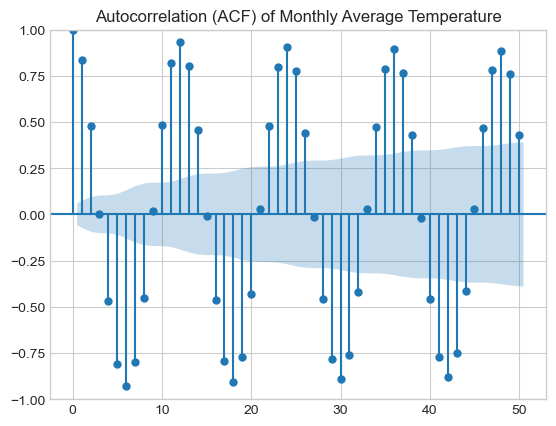

In [27]:
# ACF and PACF
# ------------------------
plt.figure(figsize=(17, 5))
plot_acf(monthly_avg.dropna(), lags=50)
plt.title("Autocorrelation (ACF) of Monthly Average Temperature")
plt.show()

- ACF (Autocorrelation Function) shows how the current value of a time series is related to its past values. It measures the correlation between observations at different lags.
→ Example: A high autocorrelation at lag 12 means the current month's temperature is strongly correlated with the temperature 12 months ago (seasonality).

- PACF (Partial Autocorrelation Function) shows the correlation between observations at a given lag after removing the effects of shorter lags.
→ Example: PACF at lag 12 shows the pure effect of the value 12 months ago on the current value, removing the influence of lag 1 to 11.

**They are used to:**
- Detect seasonality and trend patterns
- Determine order parameters for models like ARIMA/SARIMA:
- Use PACF to identify the AR (Auto-Regressive) order.
- Use ACF to identify the MA (Moving Average) order.




- Strong positive spikes at lags 12, 24, 36, etc. indicate clear annual seasonality in temperature data.

- Significant negative correlations at intermediate lags (e.g., 6, 18, 30) suggest alternating temperature patterns between seasons.

- Gradual decay in autocorrelation confirms a persistent seasonal component rather than a purely random process.

- The ACF pattern supports time series modeling approaches like SARIMA that account for seasonality.

<Figure size 1200x500 with 0 Axes>

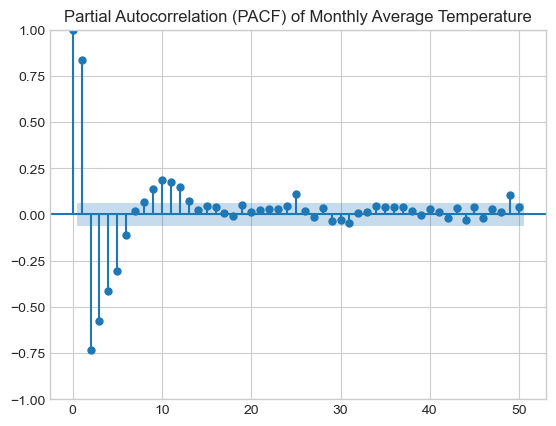

In [28]:
plt.figure(figsize=(12, 5))
plot_pacf(monthly_avg.dropna(), lags=50)
plt.title("Partial Autocorrelation (PACF) of Monthly Average Temperature")
plt.show()

- ACF shows strong autocorrelation at lag 12, 24, 36, indicating yearly seasonality in temperature data.

- ACF gradually decays, which is typical of seasonal patterns and suggests a mix of autoregressive (AR) and moving average (MA) components.

- PACF has a sharp cutoff after lag 2 or 3, implying only the first few lags have a strong direct influence on current values.

- Significant spikes in PACF around lag 12 may reflect a yearly seasonal effect that persists even after controlling for shorter lags.

- Both plots confirm the presence of seasonality and potential trend, important for choosing SARIMA over simple ARIMA.

- The consistent spike pattern in ACF and quick drop in PACF suggest the model may benefit from AR terms (based on PACF) and MA terms (based on ACF).

- The regular ACF peaks align with temperature's cyclic nature, likely due to repeating annual climate cycles.

<Figure size 3500x1600 with 0 Axes>

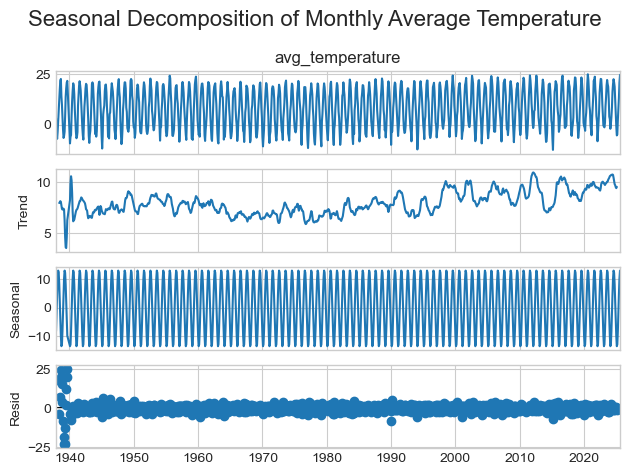

In [29]:
# Seasonal Decomposition
# ------------------------
decomposition = seasonal_decompose(monthly_avg.dropna(), model='additive', period=12)

plt.figure(figsize=(35, 16))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Monthly Average Temperature", fontsize=16)
plt.tight_layout()
plt.show()

- The observed temperature series shows strong repeating patterns, confirming seasonal behavior.

- The trend component shows a gradual increase in average temperature from the 1940s to recent years, suggesting long-term warming.

- The seasonal component is highly regular and periodic, indicating consistent yearly fluctuations in temperature.

- The seasonality pattern remains stable over the decades, reflecting consistent seasonal climate cycles.

- The residual component is relatively small and random, indicating the model captures most of the signal with trend and seasonality.

- Some large residuals in early years (pre-1950) suggest possible anomalies or data variability in that period.

- Overall, the decomposition validates the presence of both long-term trend and strong seasonality, supporting the use of seasonal time series models.

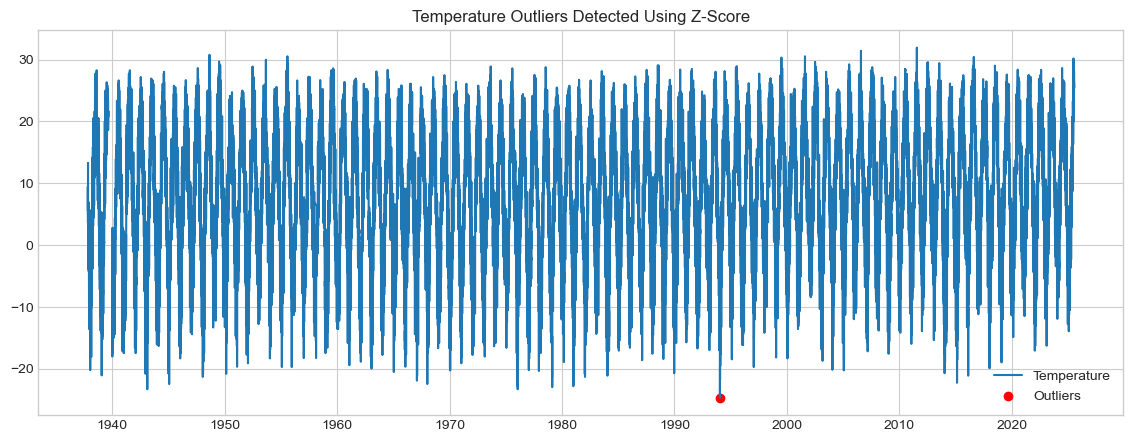

In [30]:
# Outlier Detection (Z-score Method)
# ------------------------
df['z_score'] = (df['avg_temperature'] - df['avg_temperature'].mean()) / df['avg_temperature'].std()
outliers = df[np.abs(df['z_score']) > 3]

plt.figure(figsize=(14, 5))
plt.plot(df['avg_temperature'], label='Temperature')
plt.scatter(outliers.index, outliers['avg_temperature'], color='red', label='Outliers')
plt.title('Temperature Outliers Detected Using Z-Score')
plt.legend()
plt.show()

## Explain code:

- Z-score formula: Measures how many standard deviations a data point is from the mean. Adds a new column z_score to the DataFrame, where each temperature is standardized.
- Filters the dataset to find points with a Z-score greater than 3 or less than -3, which are considered statistical outliers (beyond 99.7% of normal distribution if data is Gaussian).
- The graph will show all temperature values over time as a line. Points far from the norm (extreme heat or cold values) are highlighted in red as outliers.

C:\Users\user\AppData\Local\Temp\ipykernel_24168\1216331141.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_avg.index.astype(str), y=decade_avg.values, palette='coolwarm')


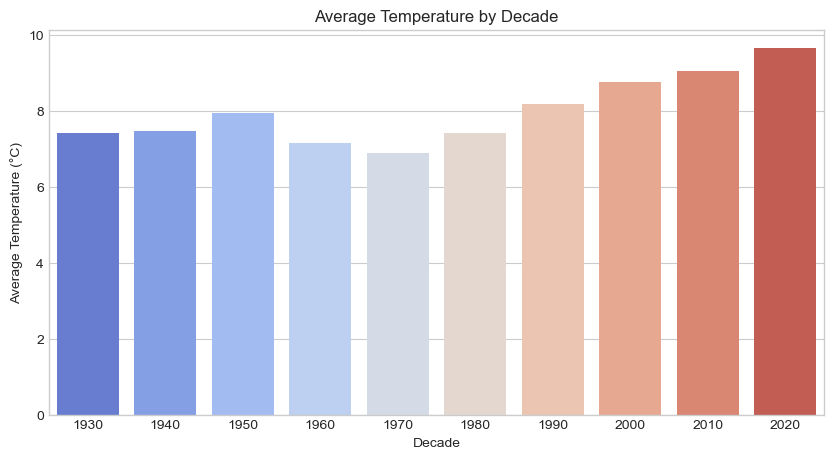

In [31]:
# Decade-Level Comparison
# ------------------------
df['year'] = df.index.year
df['decade'] = (df['year'] // 10) * 10
decade_avg = df.groupby('decade')['avg_temperature'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_avg.index.astype(str), y=decade_avg.values, palette='coolwarm')
plt.title("Average Temperature by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°C)")
plt.show()

#Forecasting and Storytelling

In [ ]:
#!pip install prophet

In [ ]:
# Required Libraries for Class 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
# Load dataset
df = pd.read_csv('weatherstats_toronto_daily.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24168\2267066218.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherstats_toronto_daily.csv')


In [33]:
df = df[['avg_temperature']].dropna()


In [34]:
# Grouping by Month
# ------------------------
monthly_avg = df['avg_temperature'].resample('M').mean().reset_index()
monthly_avg.columns = ['ds', 'y']   #Prophet will need this

C:\Users\user\AppData\Local\Temp\ipykernel_24168\4062615115.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['avg_temperature'].resample('M').mean().reset_index()


In [35]:
#Split of the data
train = monthly_avg[monthly_avg['ds'] < '2023-01-01']
test = monthly_avg[monthly_avg['ds'] >= '2023-01-01']

In [37]:
from prophet import Prophet 
#Initialize
model = Prophet()
model.fit(train)

21:15:57 - cmdstanpy - INFO - Chain [1] start processing
21:15:57 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
#Forecast for specific period
future = model.make_future_dataframe(periods=24, freq='M')
forcast = model.predict(future)

C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


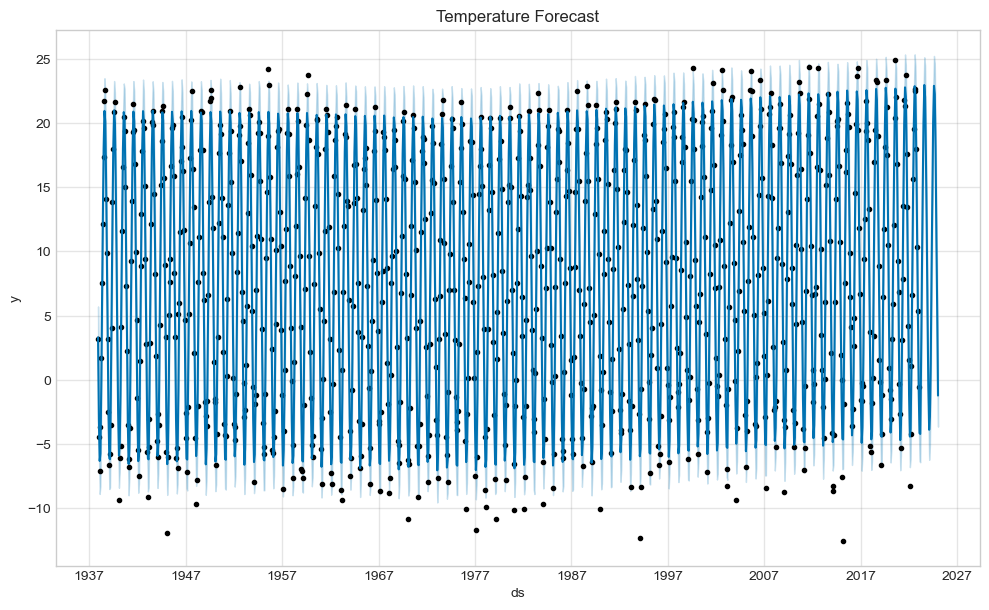

In [39]:
#Plot Forecast
fig1 = model.plot(forcast)
plt.title('Temperature Forecast')
plt.show()

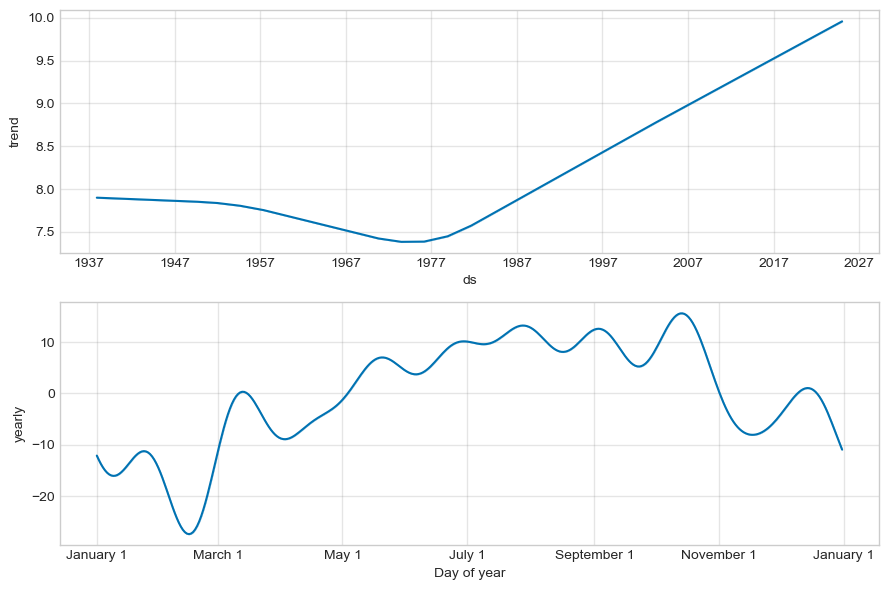

In [40]:
#Forcast Component
fig2 = model.plot_components(forcast)
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Merge Forcast

forcast_test = forcast[['ds', 'yhat']].merge(test, on ='ds', how='inner')
mae = mean_absolute_error(forcast_test['y'], forcast_test['yhat'])
mse = mean_squared_error(forcast_test['y'], forcast_test['yhat'])
print(f'Mean Absolute: {mae}')
print(f'Mean Squared: {mse}')


Mean Absolute: 1.360174726237991
Mean Squared: 2.764205019727149


In [43]:
#Climate Insight Summary
last_decade = df['2022-01-01':]['avg_temperature'].mean()
historic_decade = df['2012-01-01': '2021-12-31']['avg_temperature'].mean()

change = last_decade - historic_decade

print(last_decade)
print(historic_decade)
print(change)

9.50708430007734
9.16586914864495
0.34121515143239023


In [44]:
future_forcast = forcast[forcast['ds'] >= '2024-01-01'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(future_forcast.tail(12))

             ds       yhat  yhat_lower  yhat_upper
1034 2024-01-31  -3.890883   -6.235184   -1.430429
1035 2024-02-29  -2.883256   -5.158927   -0.718930
1036 2024-03-31   1.257562   -1.107531    3.667014
1037 2024-04-30   8.382841    5.858301   10.833829
1038 2024-05-31  14.508805   12.228584   16.866151
1039 2024-06-30  20.088515   17.779974   22.487844
1040 2024-07-31  22.901006   20.610554   25.235057
1041 2024-08-31  22.261624   19.938824   24.670969
1042 2024-09-30  18.053267   15.580058   20.415679
1043 2024-10-31  10.989613    8.610671   13.335369
1044 2024-11-30   5.487347    3.019020    7.802471
1045 2024-12-31  -1.223905   -3.644335    1.130725


In [46]:
# Save to CSV for Power BI
future_forcast.to_csv('prophet_forecast.csv', index=False)

-------------------------------------------------------------------------------------------------------------------------------

#METHOD 2

In [47]:
# Import required libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np




In [48]:

# Resample to monthly average
monthly_df = df['avg_temperature'].resample('M').mean().reset_index()
monthly_df.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y'

# Feature Engineering
monthly_df['month'] = monthly_df['ds'].dt.month
monthly_df['year'] = monthly_df['ds'].dt.year
monthly_df['sin_month'] = np.sin(2 * np.pi * monthly_df['month'] / 12)
monthly_df['cos_month'] = np.cos(2 * np.pi * monthly_df['month'] / 12)



C:\Users\user\AppData\Local\Temp\ipykernel_24168\3914181015.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['avg_temperature'].resample('M').mean().reset_index()


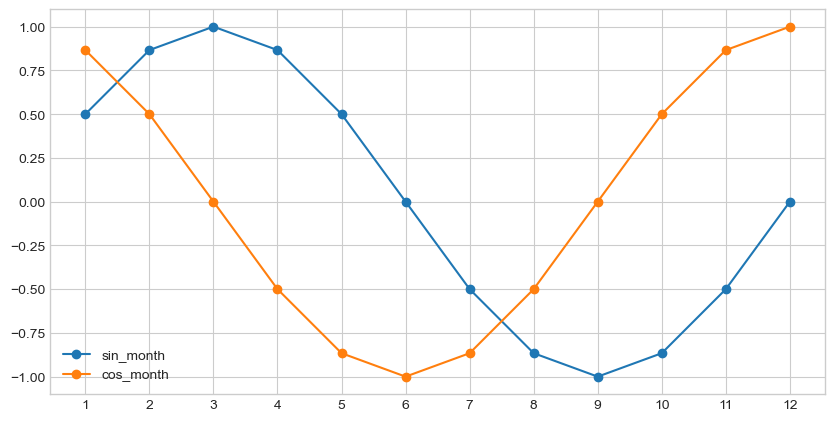

In [49]:
#Line Plot

months = np.arange(1, 13)
df = pd.DataFrame({'month': months})
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

plt.figure(figsize=(10, 5))
plt.plot(df['month'], df['sin_month'], label='sin_month', marker='o')
plt.plot(df['month'], df['cos_month'], label='cos_month', marker='o')
plt.xticks(df['month'])
plt.legend()
plt.grid(True)
plt.show()

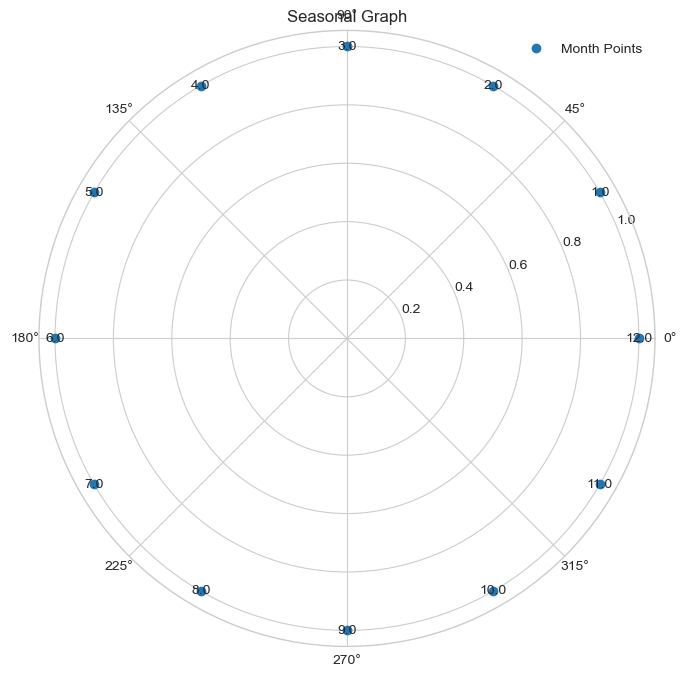

In [50]:
plt.figure(figsize=(22, 8))
plt.polar(df['month'] * 2 * np.pi / 12, np.ones(12), 'o', label='Month Points')

for i, row in df.iterrows():
  angel = row['month'] * 2 * np.pi /12
  plt.text(angel, 1.00, str(row['month']), ha='center', va='center')

plt.legend()
plt.title('Seasonal Graph')
plt.show()

In [51]:
# Forecasting with Prophet
model = Prophet(yearly_seasonality=True, seasonality_mode='additive')
model.fit(monthly_df[['ds', 'y']])

21:48:54 - cmdstanpy - INFO - Chain [1] start processing
21:48:54 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


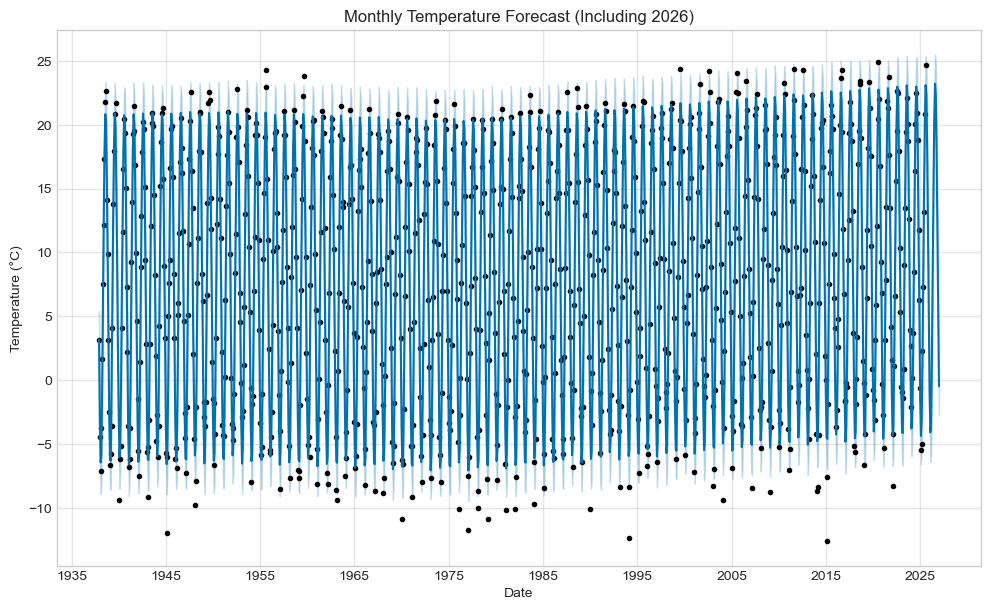

In [52]:
# Forecast till end of 2026
future = model.make_future_dataframe(periods=17, freq='M')  # 17 months from Aug 2025 to Dec 2026
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Monthly Temperature Forecast (Including 2026)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()



In [53]:
# Model Evaluation (using last 2 years as test set)
train = monthly_df.iloc[:-24]
test = monthly_df.iloc[-24:]

model_eval = Prophet()
model_eval.fit(train[['ds', 'y']])
future_test = model_eval.make_future_dataframe(periods=24, freq='M')
forecast_test = model_eval.predict(future_test)



21:49:00 - cmdstanpy - INFO - Chain [1] start processing
21:49:01 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [54]:
# Calculate MAE and RMSE
predicted = forecast_test.set_index('ds')['yhat'].loc[test['ds']]
actual = test.set_index('ds')['y']

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"\nMAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")


MAE: 1.28 °C
RMSE: 1.51 °C


In [55]:
# Insight 1: Will July 2026 Be Hotter Than Usual?
july_2026_temp = forecast[forecast['ds'] == '2026-07-31']['yhat'].values[0]
historic_julys = monthly_df[monthly_df['month'] == 7]['y']
historic_july_avg = historic_julys.mean()

print(f"\nForecasted Temp for July 2026: {july_2026_temp:.2f} °C")
print(f"Historic Average July Temp: {historic_july_avg:.2f} °C")

if july_2026_temp > historic_july_avg:
    print("July 2026 is expected to be hotter than usual.")
else:
    print("July 2026 is expected to be cooler than usual.")




Forecasted Temp for July 2026: 23.19 °C
Historic Average July Temp: 21.27 °C
July 2026 is expected to be hotter than usual.


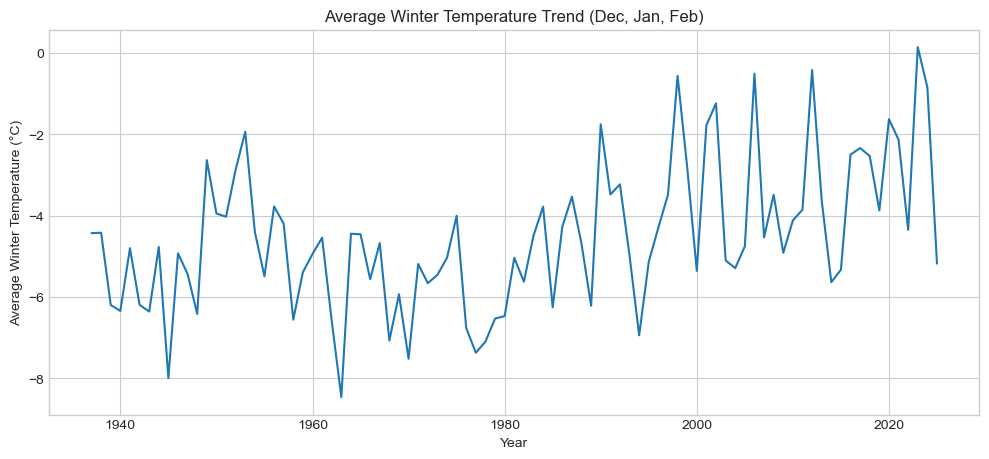

In [56]:
# Insight 2: Long-term Trend in Winter Temperatures
winter_months = monthly_df[monthly_df['month'].isin([12, 1, 2])]
winter_trend = winter_months.groupby('year')['y'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=winter_trend.index, y=winter_trend.values)
plt.title("Average Winter Temperature Trend (Dec, Jan, Feb)")
plt.xlabel("Year")
plt.ylabel("Average Winter Temperature (°C)")
plt.show()



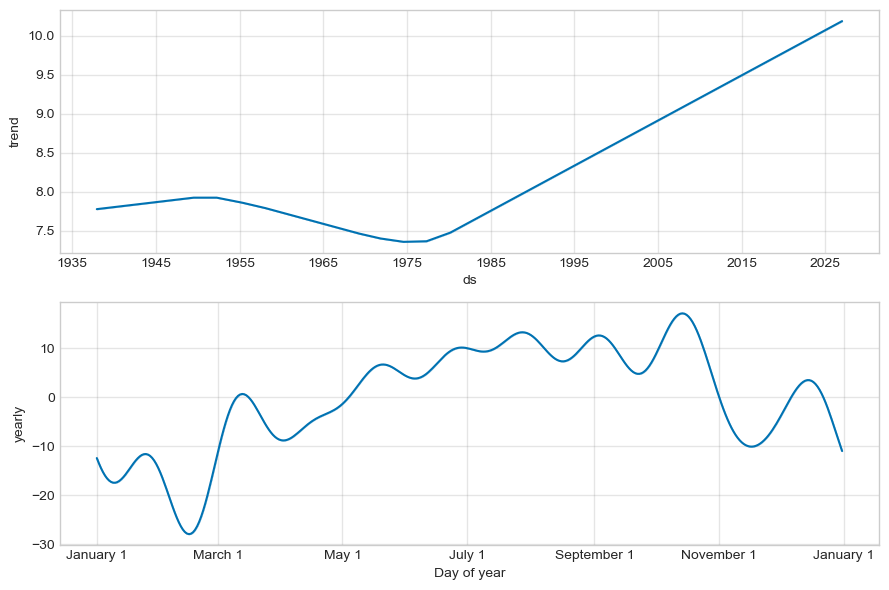

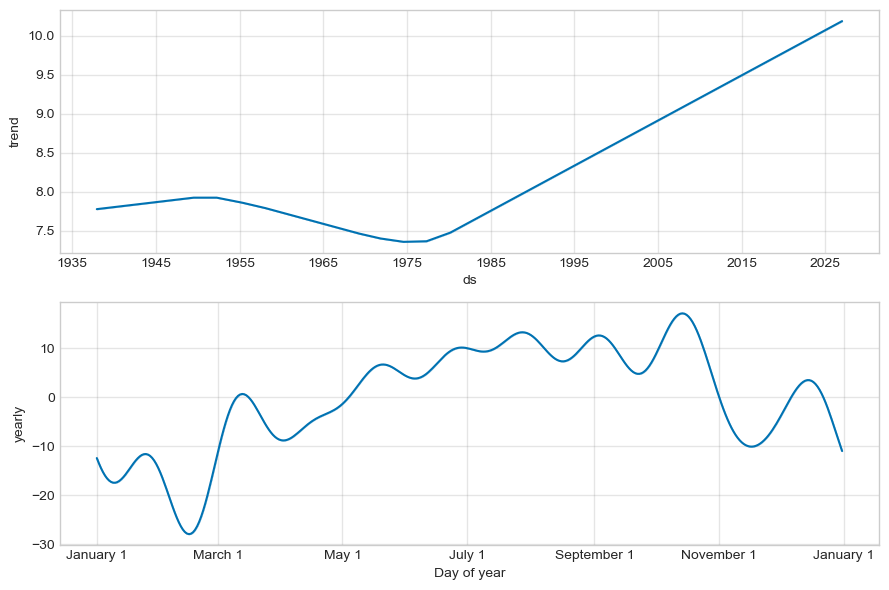

In [57]:
# Insight 3: Seasonality – Is there a 12-month pattern?
model.plot_components(forecast)

In [58]:
# Save to CSV for Power BI
forecast_test.to_csv('forecast_test.csv', index=False)

In [60]:
daily_range_data = pd.date_range(start = '2018-01-01', end= '2024-12-31', freq= 'D')
daily_temp = np.random.normal(loc=10, scale=7, size= len(daily_range_data))
percip = np.random.normal(scale=2, size=len(daily_range_data))

In [ ]:
daily_df= pd.DataFrame({
    'date'=


    
})